### 🛍️ E-Commerce Funnel Analysis & Conversion Optimization  
📊 Tools Used: Python, Pandas, Matplotlib, Seaborn

---

##### 🎯 Project Objective
This project investigates the conversion performance of an e-commerce platform using simulated session and transaction data. It aims to answer key business questions:

- Where do users drop off in the funnel?  
- Which customer segments convert best?  
- When are users most likely to purchase?  
- How much revenue is generated and by whom?
---

##### 📁 Datasets Overview

| Dataset            | Description                                                  |
|--------------------|--------------------------------------------------------------|
| `users.csv`         | 200 users: device type, traffic source, user type, location |
| `clickstream.csv`   | 10,434 records of page views, session steps, events         |
| `transactions.csv`  | 134 confirmed orders with purchase values and timestamps    |

---

#### 🧭 Project Analysis Roadmap
A structured pipeline for behavioral and revenue insights:

---
##### 📦 STEP 1: Setup & Data Loading  
- Import Python libraries  
- Load datasets (`users`, `clickstream`, `transactions`)  
- Preview structure and sample rows
---

##### 🧹 STEP 2: Data Cleaning & Exploratory Analysis  
- Convert timestamps to datetime format  
- Handle missing values and invalid entries  
- Merge datasets into unified view  
- Summary statistics and initial data profiling
---

##### 📈 STEP 3: Measure Conversions  
- Total purchase events  
- Unique buyers  
- Conversion rate  
- Repeat purchase rate
---

##### 💰 STEP 4: Revenue Analysis  
- Total revenue  
- Average Order Value (AOV)  
- Max/Min purchase amounts  
- Time-based revenue trends
---

##### 🧍 STEP 5: Segment Buyer Behavior  
- Conversion & revenue breakdown by:
  - `device_type`
  - `traffic_source`
  - `location`
---

##### ⏱️ STEP 6: Conversion Timing  
- Time-of-day and day-of-week purchasing patterns  
- Average funnel duration  
- Fast vs. delayed converters
---

##### 🧯 STEP 7: Funnel Drop-Off Insights  
- Homepage → Purchase funnel analysis  
- Drop-offs by funnel stage  
- UX issues inferred from `device_type` or segment
---

##### 📦 STEP 1: Setup & Initial Data Load
In this section, we:
- Import all required libraries
- Load the 3 key datasets: 'users.csv', 'clickstream.csv', and 'transactions.csv'
- Preview and understand the structure of each dataset

In [52]:
import os
os.listdir()

['Clickstream.csv', 'Transactions.csv', 'Users.csv']

In [47]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime, timedelta
import uuid

In [57]:
# Load the three data sets
import pandas as pd
clickstream = pd.read_csv("Clickstream.csv")
transactions = pd.read_csv("Transactions.csv")
users = pd.read_csv("Users.csv")

In [58]:
# Preview first 3 rows of each
users.head(3)

,user_id,device_type,traffic_source,user_type,location
0,U001,tablet,paid_search,new,Suriname
1,U002,desktop,paid_search,new,Croatia
2,U003,desktop,organic,returning,Egypt


In [59]:
clickstream.head(3)

,user_id,session_id,timestamp,page_name,event_type,product_id
0,U001,9979256b,2024-05-03 11:19:00,homepage,page_view,NaN
1,U001,9979256b,2024-05-03 11:21:00,product_page,page_view,P146
2,U001,9979256b,2024-05-03 11:23:00,cart,scroll,P181


In [60]:
transactions.head(3)

,user_id,order_id,order_amount,timestamp
0,U166,T8636,246.92,2024-05-02 20:49:00
1,U147,T7675,106.82,2024-05-01 10:39:00
2,NaN,T9810,173.69,2024-05-03 21:57:00


In [61]:
transactions.head()

,user_id,order_id,order_amount,timestamp
0,U166,T8636,246.92,2024-05-02 20:49:00
1,U147,T7675,106.82,2024-05-01 10:39:00
2,NaN,T9810,173.69,2024-05-03 21:57:00
3,U089,T4700,267.24,2024-05-03 16:58:00
4,U044,T2333,121.84,2024-05-02 22:42:00


#### 🧹 STEP 2: Data Cleaning & Formatting
In this step, we:
- Inspect column data types using `.info()`
- Convert timestamp fields to datetime format
- Handle missing values (e.g., in `product_id`)
- Validate that all tables are clean and ready for merging


In [62]:
###Check data types and null values

In [63]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         200 non-null    object
 1   device_type     200 non-null    object
 2   traffic_source  200 non-null    object
 3   user_type       200 non-null    object
 4   location        200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


In [64]:
clickstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10434 entries, 0 to 10433
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     10434 non-null  object
 1   session_id  10434 non-null  object
 2   timestamp   10434 non-null  object
 3   page_name   10434 non-null  object
 4   event_type  10434 non-null  object
 5   product_id  5213 non-null   object
dtypes: object(6)
memory usage: 489.2+ KB


In [65]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       134 non-null    object 
 1   order_id      150 non-null    object 
 2   order_amount  150 non-null    float64
 3   timestamp     150 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.8+ KB


In [66]:
# We explore the explore numerical patterns or categorical frequencies
users.describe()

,user_id,device_type,traffic_source,user_type,location
count,200,200,200,200,200
unique,200,3,5,2,137
top,U001,mobile,direct,new,Kuwait
freq,1,70,46,108,4


In [67]:
clickstream.describe()

,user_id,session_id,timestamp,page_name,event_type,product_id
count,10434,10434,10434,10434,10434,5213
unique,200,2985,2655,5,3,100
top,U018,b5383494,2024-05-01 17:38:00,homepage,scroll,P160
freq,74,5,13,2985,3496,70


In [68]:
transactions.describe()

,order_amount
count,150.000000
mean,151.463400
std,76.070755
min,24.490000
25%,88.607500
50%,146.975000
75%,215.607500
max,299.610000


In [69]:
#Convert timestamp columns to datetime
#Two corrections to made on clickstream.1.Correct the timestamp in "object" to "datetime". 
#Fill missing product_id values with 'unknown'

In [70]:
clickstream["timestamp"] = pd.to_datetime(clickstream["timestamp"])

In [71]:
#Fill Null with "unknown"
clickstream["product_id"] = clickstream["product_id"].fillna("Unknown")

In [72]:
# Now recheck
clickstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10434 entries, 0 to 10433
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     10434 non-null  object        
 1   session_id  10434 non-null  object        
 2   timestamp   10434 non-null  datetime64[ns]
 3   page_name   10434 non-null  object        
 4   event_type  10434 non-null  object        
 5   product_id  10434 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 489.2+ KB


In [73]:
clickstream

,user_id,session_id,timestamp,page_name,event_type,product_id
0,U001,9979256b,2024-05-03 11:19:00,homepage,page_view,Unknown
1,U001,9979256b,2024-05-03 11:21:00,product_page,page_view,P146
2,U001,9979256b,2024-05-03 11:23:00,cart,scroll,P181
3,U001,9979256b,2024-05-03 11:34:00,checkout,page_view,Unknown
4,U001,29b4ac40,2024-05-02 14:48:00,homepage,scroll,Unknown
...,...,...,...,...,...,...
10429,U200,b5383494,2024-05-02 18:24:00,homepage,scroll,Unknown
10430,U200,b5383494,2024-05-02 18:28:00,product_page,click,P170
10431,U200,b5383494,2024-05-02 18:32:00,cart,scroll,P160
10432,U200,b5383494,2024-05-02 18:33:00,checkout,click,Unknown


In [ ]:
#Save the cleaned clickstream  to csv
#clickstream.to_csv("data/cleaned_clickstream.csv") 

In [75]:
#Convert timestamp columns to datetime
transactions["timestamp"] = pd.to_datetime(transactions["timestamp"])

In [76]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       134 non-null    object        
 1   order_id      150 non-null    object        
 2   order_amount  150 non-null    float64       
 3   timestamp     150 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.8+ KB


In [77]:
#Drop Null user_id Rows
transactions = transactions.dropna(subset=["user_id"])

In [78]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       134 non-null    object        
 1   order_id      134 non-null    object        
 2   order_amount  134 non-null    float64       
 3   timestamp     134 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.2+ KB


In [320]:
#Save this cleaned version to your project’s data/ folder
transactions.to_csv("data/cleaned_transactions.csv", index=False)

In [58]:
#Merge the three Datasets i.e users, clickstream and transactions
clickstream_merged = clickstream.merge(users, on = "user_id", how = "left")

In [60]:
clickstream_merged

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10434 entries, 0 to 10433
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         10434 non-null  object        
 1   session_id      10434 non-null  object        
 2   timestamp       10434 non-null  datetime64[ns]
 3   page_name       10434 non-null  object        
 4   event_type      10434 non-null  object        
 5   product_id      10434 non-null  object        
 6   device_type     10434 non-null  object        
 7   traffic_source  10434 non-null  object        
 8   user_type       10434 non-null  object        
 9   location        10434 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 815.3+ KB


In [62]:
#Join the clickstream_merged with transactions on user_id and timestamp
final_data = clickstream_merged.merge(transactions, on=['user_id', 'timestamp'], how='left')

In [65]:
final_data.head()

,user_id,session_id,timestamp,page_name,event_type,product_id,device_type,traffic_source,user_type,location,order_id,order_amount
0,U001,9979256b,2024-05-03 11:19:00,homepage,page_view,Unknown,tablet,paid_search,new,Suriname,NaN,NaN
1,U001,9979256b,2024-05-03 11:21:00,product_page,page_view,P146,tablet,paid_search,new,Suriname,NaN,NaN
2,U001,9979256b,2024-05-03 11:23:00,cart,scroll,P181,tablet,paid_search,new,Suriname,NaN,NaN
3,U001,9979256b,2024-05-03 11:34:00,checkout,page_view,Unknown,tablet,paid_search,new,Suriname,NaN,NaN
4,U001,29b4ac40,2024-05-02 14:48:00,homepage,scroll,Unknown,tablet,paid_search,new,Suriname,NaN,NaN


In [66]:
# Save the merged and clean date
final_data.to_csv("data/final_data.csv", index=False)

#### 📊 KPI Analysis

##### 📈 STEP 3: Measure Conversions  
To evaluate funnel performance and business impact, we filtered events where `page_name == 'purchase'` and conducted the following KPI analyses:

In [74]:
#We create a specific dataset for "purchase" under column "page_name"
purchases =final_data[final_data["page_name"] == "purchase"]

In [75]:
purchases.head() # These are the close to sucessful conversions

,user_id,session_id,timestamp,page_name,event_type,product_id,device_type,traffic_source,user_type,location,order_id,order_amount
8,U001,29b4ac40,2024-05-02 14:52:00,purchase,click,Unknown,tablet,paid_search,new,Suriname,NaN,NaN
16,U001,a05ad739,2024-05-02 08:26:00,purchase,click,Unknown,tablet,paid_search,new,Suriname,NaN,NaN
21,U001,3c0d061b,2024-05-01 20:37:00,purchase,click,Unknown,tablet,paid_search,new,Suriname,T0022,241.97
26,U001,1d87fa9d,2024-05-03 18:41:00,purchase,page_view,Unknown,tablet,paid_search,new,Suriname,NaN,NaN
48,U001,0ee98fa5,2024-05-01 21:07:00,purchase,page_view,Unknown,tablet,paid_search,new,Suriname,NaN,NaN


In [135]:
purchases["device_type"].value_counts() #Users reached the "purchase" not necessarily that they purchased

device_type
mobile     263
tablet     257
desktop    224
Name: count, dtype: int64

In [136]:
# Total number of that got to the purchase page i.e 744 purchases
purchases.shape[0]

744

In [137]:
# To clean the purchase data with Null data.i.e Users that actually purchased
clean_purchases = purchases[purchases["order_amount"].notnull()]

In [138]:
# Total number of that got to the purchase page i.e 744 purchases
clean_purchases.shape[0]

134

In [139]:
#To get and count the number of unique users (user_id) who made a purchase.
clean_purchases[# To clean the purchase data with Null data.i.e Users that actually purchased
clean_purchases = purchases[purchases["order_amount"].notnull()]
# Total number of that got to the purchase page i.e 744 purchases
clean_purchases.shape[0]
134"user_id"].unique()

array(['U001', 'U003', 'U007', 'U009', 'U010', 'U012', 'U013', 'U015',
       'U017', 'U018', 'U019', 'U020', 'U022', 'U024', 'U025', 'U026',
       'U029', 'U033', 'U037', 'U039', 'U040', 'U041', 'U044', 'U046',
       'U048', 'U052', 'U053', 'U054', 'U055', 'U056', 'U057', 'U058',
       'U059', 'U061', 'U062', 'U063', 'U064', 'U067', 'U069', 'U074',
       'U075', 'U076', 'U077', 'U081', 'U082', 'U085', 'U086', 'U089',
       'U090', 'U091', 'U094', 'U095', 'U099', 'U101', 'U102', 'U105',
       'U106', 'U107', 'U109', 'U110', 'U112', 'U113', 'U114', 'U115',
       'U116', 'U117', 'U119', 'U122', 'U123', 'U130', 'U131', 'U134',
       'U136', 'U141', 'U142', 'U144', 'U147', 'U150', 'U151', 'U152',
       'U157', 'U160', 'U161', 'U162', 'U163', 'U164', 'U166', 'U168',
       'U175', 'U176', 'U177', 'U179', 'U180', 'U183', 'U185', 'U188',
       'U193', 'U196', 'U197', 'U198', 'U200'], dtype=object)

In [147]:
Total_number_users = users.shape[0]
Total_number_users

200

In [157]:
# Total real purchases
total_purchases = clean_purchases.shape[0]
total_purchases

134

In [159]:
#Unique users who made a purchase
unique_buyers =clean_purchases["user_id"].nunique()
unique_buyers

101

In [160]:
#Total users
total_users = users.shape[0]
total_users

200

In [162]:
#Conversion rate (% of all users who converted)
conversion_rate = round((unique_buyers / total_users) * 100, 2)

In [163]:
print(f"The conversion rate is equals {conversion_rate}%")

The conversion rate is equals 50.5%


In [164]:
# Repeat purchase rate (avg. purchases per buyer)
avg_purchases_per_user = round(total_purchases / unique_buyers, 2)
avg_purchases_per_user

1.33

###### Business Insight:
Metric	Meaning	Why It’s Valuable
###### 1.0	One-time purchase only	No repeat buyers
###### >1.0	Repeat buyers exist	Signals customer satisfaction, loyalty, or upsell potential
###### 1.33	Some users are buying more than once	Opportunity to build a loyalty program or recommend bundles

##### 💰 STEP 4: Revenue Analysis  
A. Total Revenue: The sum of all order amounts — how much money was generated from all purchases.
B. Average Order Value (AOV): How much users spend on average per purchase.
C. Max & Min Order Value (Range Insight)

In [166]:
# Calculate the Total Revenue
total_revenue = clean_purchases["order_amount"].sum()

In [167]:
print(f"Total revenue is ${total_revenue}")

Total revenue is $20078.97


In [168]:
# Average Order Value (AOV): i.e Total Revenue / Total Number of Purchases or mean of purchases
Average_order_value = round(clean_purchases["order_amount"].mean(),2)

In [169]:
print(f"Average Order Value amount is ${Average_order_value}")

Average Order Value amount is $149.84


In [170]:
#  Max/min order values
Max_order =  clean_purchases["order_amount"].max()
Min_order =  clean_purchases["order_amount"].min()

In [171]:
print(f"Max Order Value: ${round(Max_order, 2)}")
print(f"Min Order Value: ${round(Min_order, 2)}")

Max Order Value: $299.61
Min Order Value: $24.49


##### 🧍 STEP 5: Segment Buyer Behavior 
We’ll answer questions like:

Do desktop users spend more than mobile ("device_type")?

Which traffic sources convert best ("traffic_source") ?

Are users from certain countries more valuable ("location")?

In [111]:
#Check the unique devices used
purchases["device_type"].nunique()

3

In [172]:
clean_purchases.head()

,user_id,session_id,timestamp,page_name,event_type,product_id,device_type,traffic_source,user_type,location,order_id,order_amount
21,U001,3c0d061b,2024-05-01 20:37:00,purchase,click,Unknown,tablet,paid_search,new,Suriname,T0022,241.97
110,U003,ededd1f5,2024-05-03 08:49:00,purchase,page_view,Unknown,desktop,organic,returning,Egypt,T0111,24.49
314,U007,ff4ed4ad,2024-05-02 22:21:00,purchase,page_view,Unknown,desktop,paid_search,returning,Djibouti,T0315,200.74
444,U009,af941553,2024-05-03 22:07:00,purchase,page_view,Unknown,tablet,email,new,Wallis and Futuna,T0445,86.88
449,U009,d518169f,2024-05-02 12:06:00,purchase,scroll,Unknown,tablet,email,new,Wallis and Futuna,T0450,68.48


In [173]:
clean_purchases["device_type"].value_counts() #Users actually purchased

device_type
mobile     48
tablet     46
desktop    40
Name: count, dtype: int64

In [182]:
# Revenue by Device i.e sum of the order amount
revenue_by_device = clean_purchases.groupby("device_type")["order_amount"].sum().sort_values(ascending=False)
revenue_by_device

device_type
mobile     7399.85
desktop    6498.26
tablet     6180.86
Name: order_amount, dtype: float64

In [187]:
#Revenue_by_source
revenue_by_source = clean_purchases.groupby("traffic_source")["order_amount"].sum().sort_values(ascending=False)
revenue_by_source

traffic_source
direct         5601.65
social         4183.03
paid_search    3516.18
organic        3452.40
email          3325.71
Name: order_amount, dtype: float64

In [191]:
#Revenue by Location (Top 10)
revenue_by_location = clean_purchases.groupby("location")["order_amount"].sum().sort_values(ascending=False).head(10)
revenue_by_location 

location
Kuwait                                  1010.31
Tanzania                                 875.41
Rwanda                                   844.62
United States Minor Outlying Islands     645.17
Montserrat                               482.06
Zimbabwe                                 425.90
Swaziland                                378.42
Reunion                                  373.05
Saint Lucia                              355.69
Monaco                                   336.52
Name: order_amount, dtype: float64

In [331]:
#Save revenue by location
revenue_by_location.to_csv("data/revenue_by_location.csv")

In [194]:
#Calculates the average order value (AOV) per device group: mobile, desktop, tablet.
aov_by_device =round(clean_purchases.groupby("device_type")["order_amount"].mean().sort_values(ascending=False),2)
aov_by_device

device_type
desktop    162.46
mobile     154.16
tablet     134.37
Name: order_amount, dtype: float64

In [196]:
#Calculates the AOV by Traffic Source
aov_by_source =round(clean_purchases.groupby("traffic_source")["order_amount"].mean().sort_values(ascending=False),2)
aov_by_source

traffic_source
paid_search    167.44
direct         155.60
social         149.39
organic        143.85
email          133.03
Name: order_amount, dtype: float64

In [197]:
#Conversion Rate by Device Type
# Total who reached the purchase page (behavioral)
device_attempts = purchases["device_type"].value_counts()

# Total who actually completed purchase
device_successes = clean_purchases["device_type"].value_counts()

In [202]:
# Conversion efficiency by device
conversion_by_device = (device_successes / device_attempts * 100).round(2)
print(f" The percentage conversion by device is {conversion_by_device}")

 The percentage conversion by device is device_type
mobile     18.25
tablet     17.90
desktop    17.86
Name: count, dtype: float64


##### ⏱️ STEP 6: Conversion Timing 

###### Extract Hour and Day of Week from Timestamps

In [203]:
# Make sure the timestamp column is in datetime format
clean_purchases['timestamp'] = pd.to_datetime(clean_purchases['timestamp'])

C:\Users\oluwa\AppData\Local\Temp\ipykernel_22764\4015292724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['timestamp'] = pd.to_datetime(clean_purchases['timestamp'])


In [204]:
# Extract hour of purchase to a new column (0–23)
clean_purchases['purchase_hour'] = clean_purchases['timestamp'].dt.hour

C:\Users\oluwa\AppData\Local\Temp\ipykernel_22764\1518571680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['purchase_hour'] = clean_purchases['timestamp'].dt.hour


In [205]:
# Extract day of the week to a new column (Monday, Tuesday, etc.)
clean_purchases['purchase_day'] = clean_purchases['timestamp'].dt.day_name()

C:\Users\oluwa\AppData\Local\Temp\ipykernel_22764\3672276490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_purchases['purchase_day'] = clean_purchases['timestamp'].dt.day_name()


In [207]:
clean_purchases.head()

,user_id,session_id,timestamp,page_name,event_type,product_id,device_type,traffic_source,user_type,location,order_id,order_amount,purchase_hour,purchase_day
21,U001,3c0d061b,2024-05-01 20:37:00,purchase,click,Unknown,tablet,paid_search,new,Suriname,T0022,241.97,20,Wednesday
110,U003,ededd1f5,2024-05-03 08:49:00,purchase,page_view,Unknown,desktop,organic,returning,Egypt,T0111,24.49,8,Friday
314,U007,ff4ed4ad,2024-05-02 22:21:00,purchase,page_view,Unknown,desktop,paid_search,returning,Djibouti,T0315,200.74,22,Thursday
444,U009,af941553,2024-05-03 22:07:00,purchase,page_view,Unknown,tablet,email,new,Wallis and Futuna,T0445,86.88,22,Friday
449,U009,d518169f,2024-05-02 12:06:00,purchase,scroll,Unknown,tablet,email,new,Wallis and Futuna,T0450,68.48,12,Thursday


In [209]:
# Hourly purchase trend
purchase_hour

21       20
110       8
314      22
444      22
449      12
         ..
10188    16
10269    11
10321    18
10404    12
10409     9
Name: purchase_hour, Length: 134, dtype: int32

In [215]:
# Count purchases by hour of the day
purchases_by_hour = clean_purchases["purchase_hour"].value_counts().sort_index()
purchases_by_hour

purchase_hour
8      6
9      9
10    10
11     5
12    12
13     6
14     6
15    10
16    11
17    10
18     7
19    11
20    16
21     9
22     5
23     1
Name: count, dtype: int64

In [219]:
#Count Purchases by Day of the Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
clean_purchases["purchase_day"].value_counts().reindex(day_order)

purchase_day
Monday        NaN
Tuesday       NaN
Wednesday    44.0
Thursday     43.0
Friday       47.0
Saturday      NaN
Sunday        NaN
Name: count, dtype: float64

In [220]:
#Replace NaN with 0 
purchases_by_day = clean_purchases["purchase_day"].value_counts().reindex(day_order).fillna(0)
purchases_by_day

purchase_day
Monday        0.0
Tuesday       0.0
Wednesday    44.0
Thursday     43.0
Friday       47.0
Saturday      0.0
Sunday        0.0
Name: count, dtype: float64

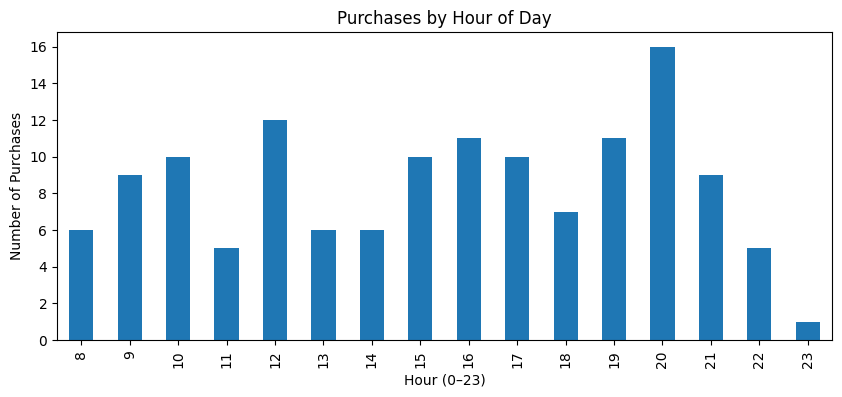

In [328]:
# Plot hourly purchase trend
purchases_by_hour.plot(kind = "bar",title='Purchases by Hour of Day', figsize=(10, 4))
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Purchases")
plt.savefig("docs/purchase_by_hour.png")
plt.show()

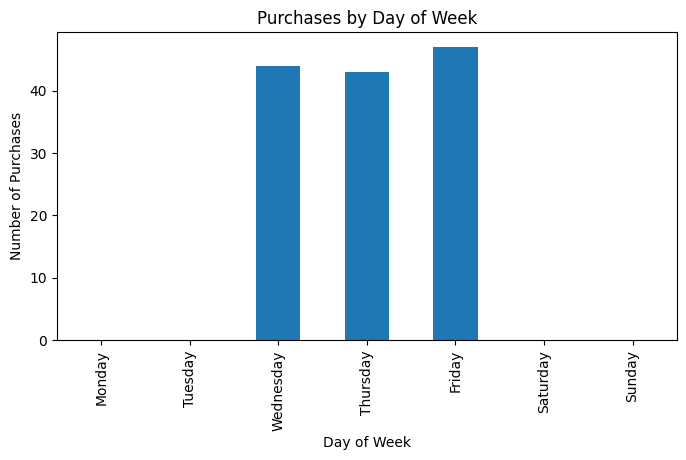

In [330]:
# Plot weekly purchase trend
purchases_by_day.plot(kind = "bar",title='Purchases by Day of Week', figsize=(8, 4))
plt.xlabel("Day of Week")
plt.ylabel("Number of Purchases")
plt.savefig("docs/purchase_by_day.png")
plt.show()

#### Funnel Duration (Time to Conversion)
##### Goal: Understand how long it takes a user to convert from their first recorded session to their final purchase

In [238]:
final_data[["page_name","timestamp"]].head()

,page_name,timestamp
0,homepage,2024-05-03 11:19:00
1,product_page,2024-05-03 11:21:00
2,cart,2024-05-03 11:23:00
3,checkout,2024-05-03 11:34:00
4,homepage,2024-05-02 14:48:00


In [244]:
#Get First Timestamp per User
##i.e To find the earliest event "timestamp" for each "user id".
first_touch = final_data.groupby("user_id")["timestamp"].min().reset_index()
first_touch.head()

,user_id,timestamp
0,U001,2024-05-01 10:31:00
1,U002,2024-05-01 08:33:00
2,U003,2024-05-01 13:06:00
3,U004,2024-05-01 11:45:00
4,U005,2024-05-01 10:42:00


In [246]:
#Rename the timestamp to "first_touch_time"
first_touch.rename(columns={"timestamp": "first_touch_time"}, inplace=True)

In [247]:
first_touch.head()

,user_id,first_touch_time
0,U001,2024-05-01 10:31:00
1,U002,2024-05-01 08:33:00
2,U003,2024-05-01 13:06:00
3,U004,2024-05-01 11:45:00
4,U005,2024-05-01 10:42:00


In [245]:
final_data.head(1)

,user_id,session_id,timestamp,page_name,event_type,product_id,device_type,traffic_source,user_type,location,order_id,order_amount
0,U001,9979256b,2024-05-03 11:19:00,homepage,page_view,Unknown,tablet,paid_search,new,Suriname,NaN,NaN


#### Get Each User’s Purchase Timestamp
##### Time user id actually purchased from the clean_purchase data


In [253]:
purchase_time = clean_purchases[["user_id", "timestamp"]].copy()

In [254]:
#Rename "timestamp" to "purchase_time"
purchase_time.rename(columns={"timestamp": "purchase_time"}, inplace=True)

In [255]:
purchase_time.head()

,user_id,purchase_time
21,U001,2024-05-01 20:37:00
110,U003,2024-05-03 08:49:00
314,U007,2024-05-02 22:21:00
444,U009,2024-05-03 22:07:00
449,U009,2024-05-02 12:06:00


##### Now we merge first_touch and purchase_time to compare how long each user took to convert.

In [258]:
#Merge First Touch (when each user first appeared on the site)
#Purchase Time (when each user made a confirmed purchase)
conversion_journey = pd.merge(purchase_time, first_touch,on = "user_id", how = "inner")
conversion_journey

,user_id,purchase_time,first_touch_time
0,U001,2024-05-01 20:37:00,2024-05-01 10:31:00
1,U003,2024-05-03 08:49:00,2024-05-01 13:06:00
2,U007,2024-05-02 22:21:00,2024-05-01 08:59:00
3,U009,2024-05-03 22:07:00,2024-05-01 13:22:00
4,U009,2024-05-02 12:06:00,2024-05-01 13:22:00
...,...,...,...
129,U196,2024-05-03 16:01:00,2024-05-01 10:39:00
130,U197,2024-05-02 11:55:00,2024-05-01 09:03:00
131,U198,2024-05-02 18:31:00,2024-05-01 08:21:00
132,U200,2024-05-03 12:41:00,2024-05-01 08:28:00


In [259]:
# Calculate Time to Convert
conversion_journey["time_to_convert"] = conversion_journey["purchase_time"] - conversion_journey["first_touch_time"]

In [260]:
conversion_journey

,user_id,purchase_time,first_touch_time,time_to_convert
0,U001,2024-05-01 20:37:00,2024-05-01 10:31:00,0 days 10:06:00
1,U003,2024-05-03 08:49:00,2024-05-01 13:06:00,1 days 19:43:00
2,U007,2024-05-02 22:21:00,2024-05-01 08:59:00,1 days 13:22:00
3,U009,2024-05-03 22:07:00,2024-05-01 13:22:00,2 days 08:45:00
4,U009,2024-05-02 12:06:00,2024-05-01 13:22:00,0 days 22:44:00
...,...,...,...,...
129,U196,2024-05-03 16:01:00,2024-05-01 10:39:00,2 days 05:22:00
130,U197,2024-05-02 11:55:00,2024-05-01 09:03:00,1 days 02:52:00
131,U198,2024-05-02 18:31:00,2024-05-01 08:21:00,1 days 10:10:00
132,U200,2024-05-03 12:41:00,2024-05-01 08:28:00,2 days 04:13:00


In [264]:
#Convert to Hours
conversion_journey["hours_to_convert"] = conversion_journey["time_to_convert"].dt.total_seconds() / 3600

In [265]:
conversion_journey.head()

,user_id,purchase_time,first_touch_time,time_to_convert,hours_to_convert
0,U001,2024-05-01 20:37:00,2024-05-01 10:31:00,0 days 10:06:00,10.100000
1,U003,2024-05-03 08:49:00,2024-05-01 13:06:00,1 days 19:43:00,43.716667
2,U007,2024-05-02 22:21:00,2024-05-01 08:59:00,1 days 13:22:00,37.366667
3,U009,2024-05-03 22:07:00,2024-05-01 13:22:00,2 days 08:45:00,56.750000
4,U009,2024-05-02 12:06:00,2024-05-01 13:22:00,0 days 22:44:00,22.733333


In [266]:
# Summary Statistics
conversion_journey.describe()

,purchase_time,first_touch_time,time_to_convert,hours_to_convert
count,134,134,134,134.000000
mean,2024-05-02 16:27:21.492537344,2024-05-01 11:12:49.253731328,1 days 05:14:32.238805970,29.242289
min,2024-05-01 08:31:00,2024-05-01 08:04:00,0 days 00:08:00,0.133333
25%,2024-05-01 19:26:30,2024-05-01 08:51:00,0 days 08:03:00,8.050000
50%,2024-05-02 16:24:00,2024-05-01 10:00:30,1 days 05:00:00,29.000000
75%,2024-05-03 12:17:30,2024-05-01 12:00:45,2 days 01:47:15,49.787500
max,2024-05-03 22:07:00,2024-05-02 09:01:00,2 days 12:22:00,60.366667
std,NaN,NaN,0 days 20:11:22.255765907,20.189515


In [321]:
#Save the data
conversion_journey.to_csv("data/conversion_journey.csv", index=False)

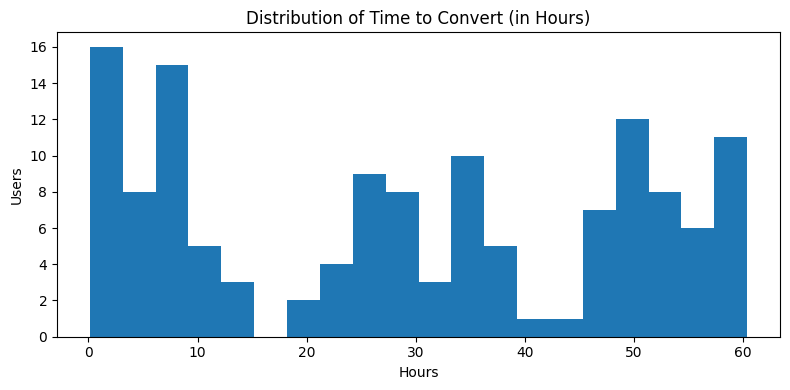

In [324]:
# Visualize Time to Convert
conversion_journey["hours_to_convert"].plot(
    kind='hist',
    bins=20,
    title='Distribution of Time to Convert (in Hours)',
    figsize=(8, 4)
)
plt.xlabel("Hours")
plt.ylabel("Users")
plt.tight_layout()
plt.savefig("docs/time_to_convert_hist.png")
plt.show()


#### Summary: Funnel Duration Analysis
Tracking how long it takes users to convert from first site visit to confirmed purchase.

---

##### Descriptive Statistics (Time to Convert in Hours)

| Metric                | Value               |
|-----------------------|---------------------|
| **Total Conversions** | 134 users           |
| **Avg. Time to Convert** | 29.2 hours       |
| **Min Time**          | 0.13 hours (~8 min) |
| **Median (50%)**      | 29.0 hours          |
| **75th Percentile**   | 49.8 hours          |
| **Max Time**          | 60.4 hours          |
| **Standard Deviation**| 20.2 hours          |

---

##### 📈 Histogram Insight (Conversion Timing Distribution)

- Most users convert within **8 to 30 hours**
- A large concentration occurs in the **first 24–36 hours**
- A small portion takes over **2 days** to complete a purchase

---

##### ✅ Business Insights & Recommendations

- ⚡ **Fast Converters**: Some users convert in minutes — ensure checkout is quick and mobile-friendly.
- 🕒 **Target Window**: 50% of users convert in ~29 hours — consider sending reminders/ads within this window.
- 🐢 **Delayed Buyers**: Those taking 2+ days may need:
  - Cart reminder emails at ~24–30 hours
  - Retargeting ads on Day 2 or Day 3

---


##### 🧯 STEP 7: Funnel Drop-Off Insights  
To understand how many users reach each stage of the funnel, where they drop off, and how many actually convert.
From each page name (Funnel Step): homepage, product_page, cart, checkout, purchase

In [277]:
#Count Unique Users per Funnel Step
funnel_users =final_data.groupby("page_name")["user_id"].nunique().sort_values(ascending=False)
funnel_users

page_name
cart            200
checkout        200
homepage        200
product_page    200
purchase        198
Name: user_id, dtype: int64

In [286]:
#Compare purchase Page Visits vs. order_id Presence
##To know how many users who hit the purchase page actually completed a purchase by checking for order_id.
### Users who reached the purchase page
users_at_purchase_page = final_data[final_data["page_name"] == "purchase"]["user_id"].nunique()
users_at_purchase_page

198

In [292]:
#Count users who actually completed a purchase (i.e., had a non-null order_id)
true_conversions = final_data[final_data["order_id"].notna()]["user_id"].nunique()
true_conversions

101

In [294]:
#Drop-Off Rate
drop_off = users_at_purchase_page - true_conversions  # 198 - 101 = 97
drop_off_rate = round((drop_off / users_at_purchase_page) * 100, 2)

In [296]:
print(f"Users who dropped off at purchase step: {drop_off}")
print(f" The drop off rate is {drop_off_rate}%")

Users who dropped off at purchase step: 97
 The drop off rate is 48.99%


📍 Out of 198 users who reached the purchase page,
✅ Only 101 completed their purchase (confirmed by order_id)
🛑 That means 97 users dropped off
📉 Final-step drop-off rate: 48.99%


In [297]:
#Funnel Chart (Visual Drop-Off)
# Labels and counts from your funnel
funnel_labels = ['Homepage', 'Product Page', 'Cart', 'Checkout', 'Purchase Page', 'Confirmed Orders']
funnel_counts = [200, 200, 200, 200, 198, 101]

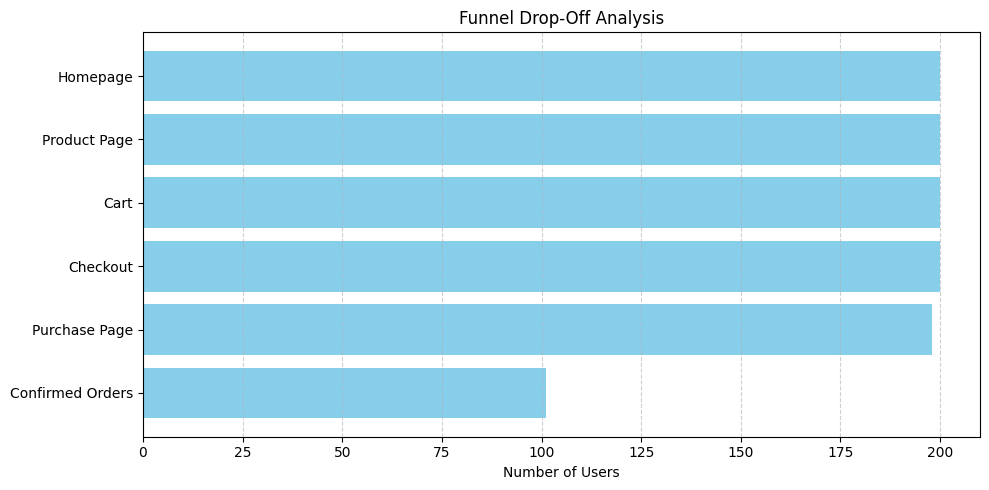

In [323]:
#Create horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(funnel_labels, funnel_counts, color='skyblue')
plt.xlabel("Number of Users")
plt.title("Funnel Drop-Off Analysis")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("docs/funnel_chart.png")
plt.show()


In [ ]:
# Create a Summary Table from "drop_off_users" and "converted_users"

In [308]:
# Get users who reached the purchase page
purchase_page_users = final_data[final_data["page_name"] == "purchase"]

In [309]:
# Get users who actually completed an order
converted_users = final_data[final_data["order_id"].notna()]

In [310]:
#Identify Users Who Dropped Off
drop_off_users = purchase_page_users[
    ~purchase_page_users["user_id"].isin(converted_users["user_id"])
]

In [312]:
#Generate the Device Summary Table
device_summary = pd.DataFrame({
    "Dropped Off": drop_off_users["device_type"].value_counts(),
    "Converted": converted_users["device_type"].value_counts()
}).fillna(0)

In [313]:
device_summary

,Dropped Off,Converted
device_type,,
desktop,97,49
mobile,123,58
tablet,94,49


In [314]:
#Calculate Drop-Off Rate
device_summary["Drop-Off Rate (%)"] = (
    device_summary["Dropped Off"] / 
    (device_summary["Dropped Off"] + device_summary["Converted"]) * 100
).round(2)


In [315]:
device_summary

,Dropped Off,Converted,Drop-Off Rate (%)
device_type,,,
desktop,97,49,66.44
mobile,123,58,67.96
tablet,94,49,65.73


In [322]:
#Save device summary.
device_summary.to_csv("data/device_summary.csv", index = False)

#### Funnel Drop-Off Analysis

##### 🎯 Objective
To identify how many users drop off at each stage of the e-commerce funnel — from landing to confirmed purchase — and where optimization is most needed.

---

##### 📊 Funnel Breakdown by Stage

| Funnel Step       | Unique Users |
|-------------------|--------------|
| Homepage          | 200          |
| Product Page      | 200          |
| Cart              | 200          |
| Checkout          | 200          |
| Purchase Page     | 198          |
| ✅ Confirmed Orders | 101          |

- 198 users reached the purchase page
- Only 101 users completed a purchase (`order_id` present)
- 📉 **Final-step drop-off rate:** 48.99% (i.e., 97 users exited after reaching purchase page)

---

##### 🔍 Device-Based Drop-Off Summary

| Device Type | Dropped Off | Converted | Drop-Off Rate (%) |
|-------------|-------------|-----------|--------------------|
| **desktop** | 97          | 49        | 66.44%             |
| **mobile**  | 123         | 58        | 67.96%             |
| **tablet**  | 94          | 49        | 65.73%             |

**Insights:**
- 🚨 All devices show high drop-off at the final step (65%–68%)
- 📱 Mobile users dropped off most (123), suggesting potential usability or trust issues
- 🖥️ Desktop users performed slightly better but still lost 66% of buyers
- 📲 Consider device-specific A/B testing on the checkout page

---

##### ✅ Key Takeaways

- Despite strong interest (198 users reached the purchase page), only 101 converted.
- That’s nearly **1 in 2 users abandoning at the final step**.
- Segmenting by `device_type` exposes usability gaps that are hidden in the overall metric.
- Recommendation: prioritize checkout UX audits for mobile and tablet users.

---